In [1]:
#%matplotlib widget
#%matplotlib ipympl

%load_ext autoreload
%autoreload 2
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import datetime
import cartopy
from metpy.units import units

import cartopy.crs as ccrs
import pickle
#import Tracking_Functions

import os
os.chdir('/work/aa0238/a271093/Scripts/')
import MOAAP.Tracking_Functions as Tracking_Functions
from MOAAP.DataLoader import * 
from MOAAP.utils import * 
from MOAAP.Corrections import * 
from MOAAP.Enumerations import Month, Season

/work/aa0238/a271093/Conda/MOAAP_env/lib/python3.12/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
from dateutil import relativedelta
from enum import Enum
from scipy import ndimage
import xarray as xr


input_field_example = '/work/aa0238/a271093/data/input/IVT_85_percentiles_CNMR_control_3dx3dy.nc'
input_field = xr.open_dataset(input_field_example, cache = True)
input_field

<xarray.Dataset> Size: 3MB
Dimensions:       (time: 12, rlat: 194, rlon: 193, nv: 4)
Coordinates:
    lat           (rlat, rlon) float32 150kB ...
    lon           (rlat, rlon) float32 150kB ...
  * rlat          (rlat) float32 776B -24.2 -23.9 -23.6 -23.3 ... 33.1 33.4 33.7
  * rlon          (rlon) float32 772B -29.9 -29.6 -29.3 -29.0 ... 27.1 27.4 27.7
  * time          (time) datetime64[ns] 96B 2014-01-31T23:00:00 ... 2014-12-3...
Dimensions without coordinates: nv
Data variables:
    IVT_85perc    (time, rlat, rlon) float32 2MB ...
    lat_bnds      (rlat, rlon, nv) float32 599kB ...
    lon_bnds      (rlat, rlon, nv) float32 599kB ...
    rotated_pole  |S1 1B ...
Attributes: (12/18)
    CDI:                       Climate Data Interface version 2.0.5 (https://...
    Conventions:               CF-1.4
    source:                    Unknown@Unknown
    institution:               Alfred Wegener Institute for Polar and Marine ...
    title:                     ICON-CLM for PolarRES
    history:                   Wed Mar  6 19:17:16 2024: ncks -d rlon,0,,3 -d...
    ...                        ...
    contact:                   jan.landwehrs@awi.de
    icon-clm_version:          2.6.6
    creation_date:             2023-12-24 13:12:41 CET
    cdo_openmp_thread_number:  8
    CDO:                       Climate Data Operators version 2.0.5 (https://...
    NCO:                       netCDF Operators version 5.0.6 (Homepage = htt...

In [3]:
#rlon = input_field.rlon.values
#rlat = input_field.rlat.values
#with open('/work/aa0238/a271093/results/MOAAP/IVT_Tracking/CNRM_control/IVT_MOAPP_ICON_control_CNRMforc_100and85controlperc_3dx3dy_1984_01_01-1984_07_01_corrected.pkl', 'rb') as pickle_file:
#    IVT_pkl = pickle.load(pickle_file)

#with open('/work/aa0238/a271093/results/MOAAP/IVT_Tracking/CNRM_control_test/IVT_MOAPP_ICON_control_CNRMforc_100and85controlperc_3dx3dy_1984_01_01-1984_08_01.pkl', 'rb') as pickle_file:
#    IVT_pkl = pickle.load(pickle_file)
    
#with open('/work/aa0238/a271093/results/MOAAP/IVT_Tracking/CNRM_control/ARs_MOAPP_ICON_control_CNRMforc_100and85controlperc_3dx3dy_1984_07_01-1985_01_01_corrected.pkl', 'rb') as pickle_file:
#    IVT_pkl = pickle.load(pickle_file)
import awkward
from collections import Counter
counter = Counter([1.1,2.3,3.4,4.22,5.33])


print (counter)

counter.update([5,6,2,3,4])
spam = Counter()
spam["egg"] += 3.4
spam

Counter({1.1: 1, 2.3: 1, 3.4: 1, 4.22: 1, 5.33: 1})


Counter({'egg': 3.4})

In [4]:
help(Counter)

Help on class Counter in module collections:

class Counter(builtins.dict)
 |  Counter(iterable=None, /, **kwds)
 |
 |  Dict subclass for counting hashable items.  Sometimes called a bag
 |  or multiset.  Elements are stored as dictionary keys and their counts
 |  are stored as dictionary values.
 |
 |  >>> c = Counter('abcdeabcdabcaba')  # count elements from a string
 |
 |  >>> c.most_common(3)                # three most common elements
 |  [('a', 5), ('b', 4), ('c', 3)]
 |  >>> sorted(c)                       # list all unique elements
 |  ['a', 'b', 'c', 'd', 'e']
 |  >>> ''.join(sorted(c.elements()))   # list elements with repetitions
 |  'aaaaabbbbcccdde'
 |  >>> sum(c.values())                 # total of all counts
 |  15
 |
 |  >>> c['a']                          # count of letter 'a'
 |  5
 |  >>> for elem in 'shazam':           # update counts from an iterable
 |  ...     c[elem] += 1                # by adding 1 to each element's count
 |  >>> c['a']                        

In [6]:
with open('/work/aa0238/a271093/results/MOAAP/IVT_Tracking/CNRM_control_test/IVT_MOAPP_ICON_control_CNRMforc_100and85controlperc_3dx3dy_1984_01_01-1984_07_01_corrected.pkl', 'rb') as pickle_file:
    IVT_pkl = pickle.load(pickle_file)
    
lat_idx_slice = IVT_pkl['1']['lat_idx_slice']
lon_idx_slice = IVT_pkl['1']['lon_idx_slice']

lat_slice = rLat[lat_idx_slice, lon_idx_slice]
lon_slice = rLon[lat_idx_slice, lon_idx_slice]

In [5]:
#a=np.argwhere(~np.isnan(IVT_pkl['1']['data_slice']))#[:,1]
#time_steps = np.unique(a[:,0])
#ls=[]
from dateutil import relativedelta
from enum import Enum
from scipy import ndimage
import awkward as ak

#from collections import namedtuple




input_field_example = '/work/aa0238/a271093/data/input/IVT_85_percentiles_CNMR_control_2dx2dy.nc'
input_field = xr.open_dataset(input_field_example, cache = True)
input_field

rLon = xr.broadcast(input_field.rlon, input_field.rlat)[0].values.T
rLat = xr.broadcast(input_field.rlon, input_field.rlat)[1].values.T

regular_Lon = input_field.lon.values
regular_Lat = input_field.lat.values

#grid_point = namedtuple('grid_point',['lat','lon'])


def get_coordinates(key,dict_, regular_coords=False):
    lat_idx_slice = dict_[key]['lat_idx_slice']
    lon_idx_slice = dict_[key]['lon_idx_slice']

    if regular_coords:
        lat_slice = regular_Lat[lat_idx_slice, lon_idx_slice]
        lon_slice = regular_Lon[lat_idx_slice, lon_idx_slice]
        
    else:
        lat_slice = rLat[lat_idx_slice, lon_idx_slice]
        lon_slice = rLon[lat_idx_slice, lon_idx_slice]
    
    
    indices = np.argwhere(~np.isnan(dict_[key]['data_slice']))#[:,1]
    time_steps = np.unique(indices[:,0])
    
    
    #coordinates_ls = []
    ls_lat=[]
    ls_lon=[]
    for tstep in time_steps:
        idx = indices[indices[:,0]==tstep][:,1:]
        #sub_ls_lat = [lat_slice[tuple(x)] for x in idx]
        #sub_ls_lon = [lon_slice[tuple(x)] for x in idx]
        
        sub_ls_lat = [lat_slice[tuple(x)] for x in idx]
        sub_ls_lon = [lon_slice[tuple(x)] for x in idx]
        
        #sub_coordinates_ls = [grid_point(lat,lon) for lat,lon in zip(sub_ls_lat,sub_ls_lon)]
        
        #coordinates_ls.append(sub_coordinates_ls)
        ls_lat.append(sub_ls_lat )
        ls_lon.append(sub_ls_lon )


        #np.append(arr,ls)
    return (np.array(ls_lat, dtype='np.array'), np.array(ls_lon, dtype='object'))
    #return (ak.Array(ls_lat), ak.Array(ls_lon))

    #return (ls_lat, np.array(ls_lon))
    #return np.array(coordinates_ls)


In [155]:
with open('/work/aa0238/a271093/results/MOAAP/IVT_Tracking/CNRM_control_test/IVT_MOAPP_ICON_control_CNRMforc_100and85controlperc_3dx3dy_1984_01_01-1984_07_01_corrected.pkl', 'rb') as pickle_file:
    IVT_pkl = pickle.load(pickle_file)
Lat,Lon=get_coordinates('10', IVT_pkl)

TypeError: data type 'np.array' not understood

In [139]:
#counter=Counter([grid_point(lat,lon) for lat, lon in zip(ak.flatten(Lat),ak.flatten(Lon))])


In [8]:
ak.Array(list(v.values))


NameError: name 'v' is not defined

In [169]:
v

<xarray.DataArray 'rlats' (times: 12)> Size: 96B
array([list([-22.0, -22.0]),
       list([-23.0, -23.0, -22.8, -22.8, -22.6, -22.6, -22.6, -22.6, -22.4, -22.4, -22.4, -22.4, -22.2, -22.2, -22.2, -22.2, -22.2, -22.0, -22.0, -22.0, -22.0, -22.0, -21.8, -21.8, -21.8]),
       list([-23.2, -23.0, -23.0, -23.0, -22.8, -22.8, -22.8, -22.6, -22.6, -22.6, -22.4, -22.4, -22.4, -22.4, -22.2, -22.2, -22.2, -22.2, -22.0, -22.0, -22.0, -22.0, -22.0, -21.8, -21.8, -21.8, -21.8, -21.8, -21.8, -21.6, -21.6, -21.6, -21.6, -21.4, -21.4]),
       list([-23.2, -23.0, -23.0, -23.0, -22.8, -22.8, -22.8, -22.6, -22.6, -22.6, -22.4, -22.4, -22.4, -22.4, -22.2, -22.2, -22.2, -22.2, -22.0, -22.0, -22.0, -22.0, -22.0, -21.8, -21.8, -21.8, -21.8, -21.8, -21.8, -21.6, -21.6, -21.6, -21.6, -21.6, -21.4, -21.4, -21.4, -21.4, -21.4, -21.2, -21.2, -21.2, -21.0, -21.0]),
       list([-23.2, -23.0, -23.0, -22.8, -22.8, -22.8, -22.6, -22.6, -22.6, -22.6, -22.4, -22.4, -22.4, -22.4, -22.2, -22.2, -22.2, -22.2, -22.2, -22.0, -22.0, -22.0, -22.0, -22.0, -21.8, -21.8, -21.8, -21.8, -21.8, -21.8, -21.6, -21.6, -21.6, -21.6, -21.6, -21.6, -21.4, -21.4, -21.4, -21.4, -21.4, -21.4, -21.2, -21.2, -21.2, -21.2, -21.2, -21.0, -21.0, -21.0, -21.0, -21.0, -20.8, -20.8, -20.8]),
       list([-23.0, -23.0, -22.8, -22.8, -22.8, -22.6, -22.6, -22.6, -22.6, -22.4, -22.4, -22.4, -22.4, -22.2, -22.2, -22.2, -22.2, -22.0, -22.0, -22.0, -22.0, -22.0, -21.8, -21.8, -21.8, -21.8, -21.8, -21.8, -21.6, -21.6, -21.6, -21.6, -21.6, -21.6, -21.4, -21.4, -21.4, -21.4, -21.4, -21.4, -21.2, -21.2, -21.2, -21.2, -21.2, -21.2, -21.0, -21.0, -21.0, -21.0, -21.0, -20.8, -20.8, -20.8, -20.8, -20.8, -20.6, -20.6, -20.6, -20.4, -20.4]),
       list([-23.0, -22.8, -22.8, -22.6, -22.6, -22.6, -22.4, -22.4, -22.4, -22.2, -22.2, -22.2, -22.2, -22.0, -22.0, -22.0, -22.0, -22.0, -21.8, -21.8, -21.8, -21.8, -21.8, -21.6, -21.6, -21.6, -21.6, -21.6, -21.6, -21.4, -21.4, -21.4, -21.4, -21.4, -21.4, -21.2, -21.2, -21.2, -21.2, -21.2, -21.0, -21.0, -21.0, -21.0, -21.0, -21.0, -20.8, -20.8, -20.8, -20.8, -20.8, -20.8, -20.6, -20.6, -20.6, -20.6, -20.4, -20.4, -20.4, -20.2, -20.2]),
       list([-22.8, -22.8, -22.6, -22.4, -22.4, -22.4, -22.2, -22.2, -22.2, -22.0, -22.0, -22.0, -22.0, -21.8, -21.8, -21.8, -21.8, -21.8, -21.6, -21.6, -21.6, -21.6, -21.6, -21.6, -21.4, -21.4, -21.4, -21.4, -21.4, -21.2, -21.2, -21.2, -21.2, -21.2, -21.2, -21.0, -21.0, -21.0, -21.0, -21.0, -21.0, -20.8, -20.8, -20.8, -20.8, -20.8, -20.6, -20.6, -20.6, -20.6, -20.6, -20.4, -20.4, -20.4, -20.4, -20.2, -20.2]),
       list([-22.8, -22.6, -22.4, -22.4, -22.2, -22.2, -22.0, -22.0, -21.8, -21.8, -21.8, -21.6, -21.6, -21.6, -21.6, -21.6, -21.4, -21.4, -21.4, -21.4, -21.4, -21.4, -21.2, -21.2, -21.2, -21.2, -21.2, -21.0, -21.0, -21.0, -21.0, -21.0, -21.0, -20.8, -20.8, -20.8, -20.8, -20.8, -20.6, -20.6, -20.6, -20.6, -20.6, -20.4, -20.4, -20.4, -20.4, -20.2, -20.2]),
       list([-22.6, -21.8, -21.6, -21.6, -21.6, -21.4, -21.4, -21.4, -21.2, -21.2, -21.2, -21.2, -21.2, -21.0, -21.0, -21.0, -21.0, -21.0, -20.8, -20.8, -20.8, -20.8, -20.8, -20.6, -20.6, -20.6, -20.6, -20.6, -20.4, -20.4, -20.4, -20.4, -20.2, -20.2]),
       list([-22.6, -21.2, -21.2, -21.2, -21.0, -21.0, -21.0, -21.0, -20.8, -20.8, -20.8, -20.8, -20.6, -20.6, -20.6, -20.6, -20.4, -20.4, -20.2, -20.2]),
       list([-21.0, -20.6, -20.6, -20.4])], dtype=object)
Coordinates:
  * times    (times) datetime64[ns] 96B 1984-01-01T23:00:00 ... 1984-01-02T10...

In [307]:
IVTobj_ls.sort(reverse=True,key= lambda x: getattr(x.get,'duration'))
IVTobj_ls.sortby('duration',reverse=True)
IVTobj_ls[0].get.duration

In [88]:
a=IVTobj_ls.sel_season(season=Season.ALL)#.sortby('duration',reverse=True)

In [89]:
a.sortby('duration',reverse=True)

In [90]:
a[0].get.duration

354

In [140]:
class Object_container(list):
    #def __init__(self, iterable):
    #    super().__init__(str(item) for item in iterable)
    def sel_season(self, season):
        return IVT_container([x  for x in self if pd.to_datetime(x.get.start_date).month in season])
    
    def get_attributes(self,attr):
        return [getattr(x.get,attr) for x in self]
    
    def obj_means(self, attr):
        return np.squeeze([x.get.mean(attr) for x in self])
    
    def max(self,attr):
        return np.max([getattr(x.get, attr) for x in self])
    
    def min(self,attr):
        return np.max([getattr(x.get, attr) for x in self])
    
        
    
    def count(self):
        return len(self)
    
    def sortby(self,attr,reverse = False):
        
        return self.sort(reverse=reverse, key= lambda x: getattr(x.get,attr) )
        
    
    def sel(self, condition):
        pass
        
   
    

def create_obj_from_dict(dict_, key, input_path, input_file_name_temp, start_date, end_date, nc_correct=True):
        if nc_correct:
            end_date = end_date+relativedelta.relativedelta(months=1)
            
            
        ds = xr.Dataset(
            data_vars=dict(
                            id_ = key,
                
                            nc_file = f'{input_path}ObjectMasks_{input_file_name_temp}_{get_datetime_str(start_date)}-{get_datetime_str(end_date)}.nc',
                            size=(['times'], dict_[key]['size']*1e-6 * units('km^2')),

                            total_IVT=(['times'], dict_[key]['tot']* units('kg/m/s')),
                            mean_IVT=(['times'], dict_[key]['mean']* units('kg/m/s')),
                            max_IVT=(['times'], dict_[key]['max']* units('kg/m/s')),
                            min_IVT=(['times'], dict_[key]['min']* units('kg/m/s')),

                            mass_center_rlat=(['times'], dict_[key]['mass_center_loc'][:,0]),
                            mass_center_rlon=(['times'], dict_[key]['mass_center_loc'][:,1]),
                            #mass_center_rot = (['times'], [[lat,lon] for lat,lon in zip(dict_[key]['mass_center_loc'][:,0],dict_[key]['mass_center_loc'][:,1])]),
                            #mass_center_rot = (['times'], [grid_point(lat,lon) for lat,lon in zip(dict_[key]['mass_center_loc'][:,0],dict_[key]['mass_center_loc'][:,1])]),

            
                            track_rlat=(['times'], dict_[key]['track'][:,0]),
                            track_rlon=(['times'], dict_[key]['track'][:,1]),
                            #track_rot = (['times'], np.array([grid_point(lat,lon) for lat,lon in zip(dict_[key]['track'][:,0],dict_[key]['track'][:,1])])),

            
                            speed=(['times'], np.insert(dict_[key]['speed'],0,np.nan)* units('m/s')),
                            rlats=(['times'], get_coordinates(key, dict_)[0]),
                            rlons=(['times'], get_coordinates(key, dict_)[1]),
                            #grid_points_rot = (['times'], get_coordinates(key, dict_)),
                            #regular_lats=(['times'], get_coordinates(key, dict_,regular_coords=True)[0]),
                            #regular_lons=(['times'], get_coordinates(key, dict_,regular_coords=True)[1])

                            ),
            coords=dict(
                        times=dict_[key]['times']
                        )
                    )
        
        return ds
    

In [141]:
@xr.register_dataset_accessor("get")
class Accessor:
    def __init__(self, xarray_obj):
        self._obj = xarray_obj
        #self.start_date = None
        
    
    @property
    def start_date(self):
        return self._obj.times[0].values
    
    @property
    def nc_file(self):
        return self._obj.nc_file.values.tolist()
    
    
    def mean(self,attr):
        return np.mean(getattr(self._obj.get, attr))
    
    def min(self,attr):
        return np.min(getattr(self._obj.get, attr))
    
    def max(self,attr):
        return np.max(getattr(self._obj.get, attr))
    
    @property
    def duration(self):
        return self._obj.times.size
    
    @property
    def speed(self):
        return self._obj.speed
    
    @property
    def track_rlat(self):
        return self._obj.track_rlat
    
    @property
    def track_rlon(self):
        return self._obj.track_rlon
    
    @property
    def mass_center_rlon(self):
        return self._obj.mass_center_rlon
    
    @property
    def mass_center_rlat(self):
        return self._obj.mass_center_rlat
    
    @property
    def total_IVT(self):
        return self._obj.total_IVT
    
    @property
    def size(self):
        return self._obj.size
    
    @property
    def regular_lat_origin(self):
        return self.regular_lats.sel(times=self.times[0])
    
    @property
    def rlat_origin(self):
        return self._obj.track_rlat.sel(times=self._obj.times[0])
    
    @property
    def rlon_origin(self):
        return self._obj.track_rlon.sel(times=self._obj.times[0])
    
    #@property
    #def mean(self):
    #    return np.mean(getattr(self._obj, "size"))
    
    #@cached_property 
    #def grid_points(self, cache =False):
    #    ds = xr.open_dataset(self._obj.get.nc_file, cache = cache)
    #    return ds
    
    
    

/tmp/ipykernel_3910396/340829964.py:1: AccessorRegistrationWarning: registration of accessor <class '__main__.Accessor'> under name 'get' for type <class 'xarray.core.dataset.Dataset'> is overriding a preexisting attribute with the same name.
  @xr.register_dataset_accessor("get")


In [142]:
first_year = 1984
last_year = 1985

start_date_list, end_date_list = create_datetime_lists(first_year,last_year, months=6, correct_last_endtime=False) 
#start_date_list_nc, end_date_list_nc = create_datetime_lists(first_year,last_year, months=7, correct_last_endtime=False) 

first_processed_date = start_date_list[0]
last_processed_date = end_date_list[-1]
#end_date_list

In [145]:
IVTobj_ls=Object_container([])
input_path = '/work/aa0238/a271093/results/MOAAP/IVT_Tracking/CNRM_control_test/'
type_='IVT'
input_file_name_temp = 'MOAPP_ICON_control_CNRMforc_100and85controlperc_3dx3dy'

for start_date, end_date in zip(start_date_list, end_date_list):
    print(start_date)
    pickle_file_path = f'{input_path}{type_}_{input_file_name_temp}_{get_datetime_str(start_date)}-{get_datetime_str(end_date)}_corrected'
    
    dict_ = get_dict_from_pkl(pickle_file_path)
    

    for object_id in dict_.keys():
        try:
            ds = create_obj_from_dict(dict_,
                                      object_id,
                                      input_path,
                                      input_file_name_temp,
                                      start_date,
                                      end_date,
                                  
                                     )
        except ValueError as ex:
            #print (object_id)
            #print ("start=",dict_[object_id]['times'][0])
            #print ("end=",dict_[object_id]['times'][-1])

            #print(ex)
            continue
        
        IVTobj_ls.append(ds)
    

    

        
    IVTobj_ls.append(ds)
    
    
    

1984-01-01 00:00:00
1984-07-01 00:00:00


In [173]:
np.array([grid_point(lat,lon) for lat,lon in zip(dict_['5001']['mass_center_loc'][:,0],dict_['5001']['mass_center_loc'][:,1])])
v=IVTobj_ls[0]

In [174]:
v

Magnitude,[2076.537385996453 25871.607436335624 36265.25623969685 45676.310472308105 57191.766458763115 63541.271692869086 63647.49863624742 59539.51641743019 51238.02377981598 35644.53281526796 20992.82366884222 4206.457485086619]
Units,kilometer2
Magnitude,[202.78919982910156 2683.77880859375 3928.289794921875 5037.93359375 6313.8232421875 6994.6875 6905.0244140625 6336.4521484375 5331.0634765625 3639.072509765625 2069.7294921875 404.294189453125]
Units,kilogram/(meter second)
Magnitude,[101.39459991455078 107.35115051269531 112.23685455322266 114.49848937988281 114.79678344726562 114.66700744628906 113.1971206665039 111.16582489013672 108.79721069335938 107.03154754638672 103.4864730834961 101.07354736328125]
Units,kilogram/(meter second)
Magnitude,[101.8093490600586 113.1312484741211 129.64857482910156 136.5568389892578 136.34048461914062 131.07618713378906 129.0066680908203 127.2684326171875 122.74429321289062 117.74048614501953 111.74303436279297 102.37213897705078]
Units,kilogram/(meter second)
Magnitude,[100.97985076904297 101.25468444824219 100.11192321777344 100.4676513671875 100.53407287597656 100.31278991699219 100.02296447753906 100.28279113769531 100.65713500976562 100.00709533691406 100.00740051269531 100.25054168701172]
Units,kilogram/(meter second)
Magnitude,[nan 96.14071771783239 25.99100182559979 34.3509923509842 28.228899050446202 30.021914428336114 29.27390866557059 21.440589579715102 18.356443025119713 44.301346245741414 23.87065078028174 32.61598517091975]


In [35]:
[grid_point(lat,lon) for lat,lon in zip(dict_['5001']['track'][:,0],dict_['5001']['track'][:,1])]

[grid_point(lat=-19.399999618530273, lon=-5.900000095367432),
 grid_point(lat=-19.399999618530273, lon=-6.199999809265137),
 grid_point(lat=-19.399999618530273, lon=-6.5),
 grid_point(lat=-19.399999618530273, lon=-6.800000190734863),
 grid_point(lat=-19.700000762939453, lon=-7.099999904632568),
 grid_point(lat=-19.700000762939453, lon=-7.400000095367432),
 grid_point(lat=-19.700000762939453, lon=-7.699999809265137),
 grid_point(lat=-20.0, lon=-8.300000190734863),
 grid_point(lat=-20.0, lon=-8.300000190734863),
 grid_point(lat=-19.700000762939453, lon=-8.300000190734863)]

In [152]:
IVTobj_ls[0].regular_lats.sel(times=IVTobj_ls[0].times[0])

<xarray.DataArray 'regular_lats' ()>
array(list([59.97047, 60.08967]), dtype=object)
Coordinates:
    times    datetime64[ns] 1984-01-01T23:00:00

<xarray.DataArray 'times' (times: 36)>
array(['1984-01-08T13:00:00.000000000', '1984-01-08T14:00:00.000000000',
       '1984-01-08T15:00:00.000000000', '1984-01-08T16:00:00.000000000',
       '1984-01-08T17:00:00.000000000', '1984-01-08T18:00:00.000000000',
       '1984-01-08T19:00:00.000000000', '1984-01-08T20:00:00.000000000',
       '1984-01-08T21:00:00.000000000', '1984-01-08T22:00:00.000000000',
       '1984-01-08T23:00:00.000000000', '1984-01-09T00:00:00.000000000',
       '1984-01-09T01:00:00.000000000', '1984-01-09T02:00:00.000000000',
       '1984-01-09T03:00:00.000000000', '1984-01-09T04:00:00.000000000',
       '1984-01-09T05:00:00.000000000', '1984-01-09T06:00:00.000000000',
       '1984-01-09T07:00:00.000000000', '1984-01-09T08:00:00.000000000',
       '1984-01-09T09:00:00.000000000', '1984-01-09T10:00:00.000000000',
       '1984-01-09T11:00:00.000000000', '1984-01-09T12:00:00.000000000',
       '1984-01-09T13:00:00.000000000', '1984-01-09T14:00:00.000000000',
       '1984-01-09T15:00:00.000000000', '1984-01-09T16:00:00.000000000',
       '1984-01-09T17:00:00.000000000', '1984-01-09T18:00:00.000000000',
       '1984-01-09T19:00:00.000000000', '1984-01-09T20:00:00.000000000',
       '1984-01-09T21:00:00.000000000', '1984-01-09T22:00:00.000000000',
       '1984-01-09T23:00:00.000000000', '1984-01-10T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * times    (times) datetime64[ns] 1984-01-08T13:00:00 ... 1984-01-10

Text(0.5, 1.0, 'Total count of IVT occurrences over entire domain')

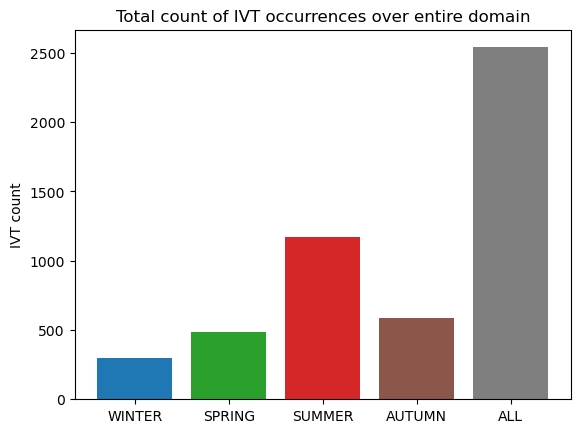

In [91]:

fig, ax = plt.subplots()

seasons = [x.name for x in Season]
bar_labels = ['red', 'blue', '_green', 'brown','ff']
bar_colors = ['tab:blue', 'tab:green', 'tab:red', 'tab:brown','tab:gray']

counts=[]
for season_ in Season:
    counts.append(IVTobj_ls.sel_season(season=season_).count())

    
ax.bar(seasons, counts, color=bar_colors)

ax.set_ylabel('IVT count')
ax.set_title('Total count of IVT occurrences over entire domain')
#plt.grid()
#ax.legend(title='Season')

[<xarray.DataArray 'size' (times: 12)>
 <Quantity([ 2076.537386   25871.60743634 36265.2562397  45676.31047231
  57191.76645876 63541.27169287 63647.49863625 59539.51641743
  51238.02377982 35644.53281527 20992.82366884  4206.45748509], 'kilometer ** 2')>
 Coordinates:
   * times    (times) datetime64[ns] 1984-01-01T23:00:00 ... 1984-01-02T10:00:00,
 <xarray.DataArray 'size' (times: 15)>
 <Quantity([ 2058.72540756  3089.1822371   6187.11925685 11345.94723336
  14448.11336565 16517.64529183 21695.67041297 25851.69203343
  25862.27237463 23792.85304248 17599.3047853  15525.58902175
  11386.62174367  6214.92290517  1034.76008145], 'kilometer ** 2')>
 Coordinates:
   * times    (times) datetime64[ns] 1984-01-04T05:00:00 ... 1984-01-04T19:00:00,
 <xarray.DataArray 'size' (times: 17)>
 <Quantity([ 4343.9286837  11956.50275731 16320.85815936 16336.12180224
  15260.13018837 12000.68094708 12012.76529059 12022.32827245
  14218.97588951 13137.05533727 12055.6348113   8775.74869474
   5487.305029

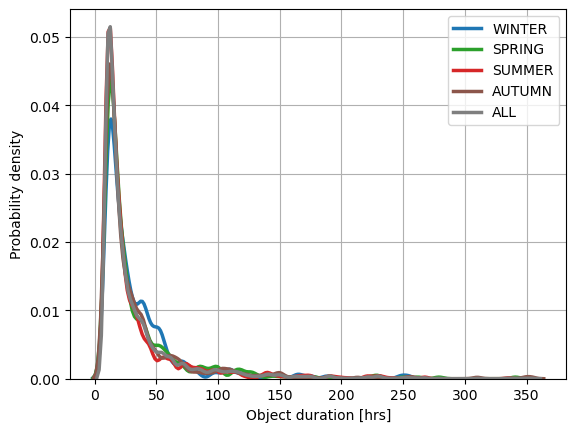

In [93]:
import seaborn as sns
fig, ax = plt.subplots()

for i,season_ in enumerate(Season):

    #fig, ax = plt.subplots()

    dat=IVTobj_ls.sel_season(season=season_).get_attributes(attr='duration')##obj_means("size")
    sns.kdeplot(dat,label=season_.name,color=bar_colors[i],lw=2.5,bw_adjust=0.3)
    #sns.histplot(dat,label=season_.name,color=bar_colors[i],bins=100, stat='density')

    

ax.set_xlabel('Object duration [hrs]')
ax.set_ylabel('Probability density')
plt.legend()
plt.grid()
#ax.set_xlim(9,150)



(0.0, 150000.0)

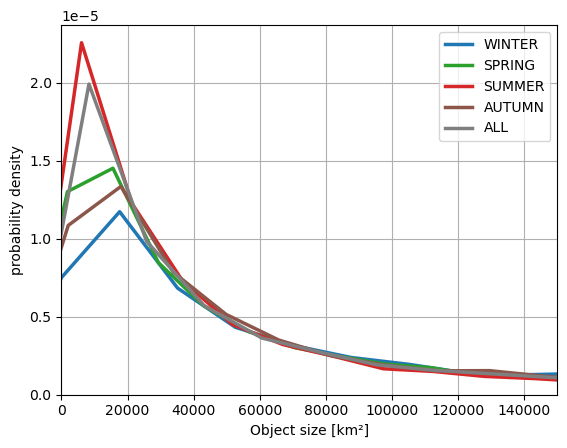

In [52]:
fig, ax = plt.subplots()

for i,season_ in enumerate(Season):

    #fig, ax = plt.subplots()

    dat=IVTobj_ls.sel_season(season=season_).obj_means(attr='size')##obj_means("size")
    sns.kdeplot(dat,label=season_.name,color=bar_colors[i],lw=2.5,bw_adjust=0.1)
   # sns.histplot(dat,label=season_.name,color=bar_colors[i],lw=2.5)
    #sns.histplot(dat,label=season_.name,color=bar_colors[i],bins=100, stat='density')

    

ax.set_xlabel('Object size [km²]')
ax.set_ylabel('probability density')
plt.legend()
plt.grid()
ax.set_xlim(0,150000)


(0.0, 13000.0)

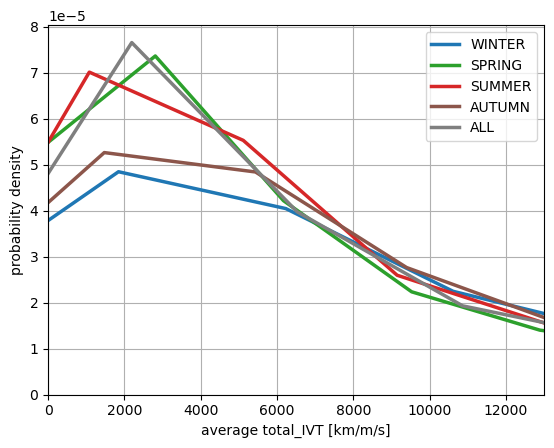

In [56]:
fig, ax = plt.subplots()

for i,season_ in enumerate(Season):

    #fig, ax = plt.subplots()

    dat=IVTobj_ls.sel_season(season=season_).obj_means(attr='total_IVT')##obj_means("size")
    sns.kdeplot(dat,label=season_.name,color=bar_colors[i],lw=2.5,bw_adjust=0.3)
   # sns.histplot(dat,label=season_.name,color=bar_colors[i],lw=2.5)
    #sns.histplot(dat,label=season_.name,color=bar_colors[i],bins=100, stat='density')

    

ax.set_xlabel('average total_IVT [km/m/s]')
ax.set_ylabel('probability density')
plt.legend()
plt.grid()
ax.set_xlim(0,13000)

In [289]:
a=IVTobj_ls.sel_season(season=Season.SUMMER)#.sortby('duration')

In [312]:
a=IVTobj_ls.sel_season(season=Season.SUMMER).sortby('duration',reverse=True)

Text(0.5, 1.0, 'Total count of IVT occurrences over entire domain')

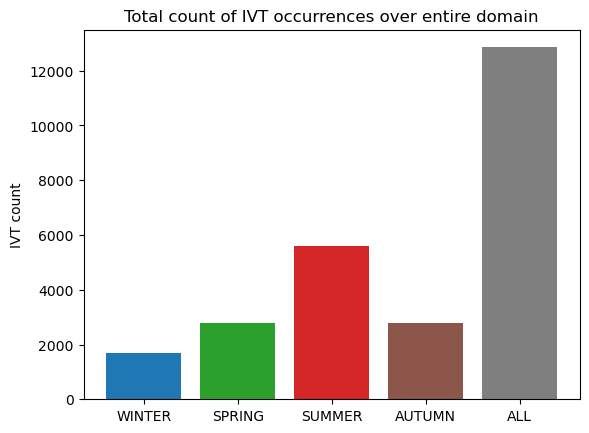

In [59]:
fig, ax = plt.subplots()

seasons = [x.name for x in Season]
bar_labels = ['red', 'blue', '_green', 'brown','ff']
bar_colors = ['tab:blue', 'tab:green', 'tab:red', 'tab:brown','tab:gray']

counts=[]
for season_ in Season:
    counts.append(IVTobj_ls.sel_season(season=season_).count())

    
ax.bar(seasons, counts, color=bar_colors)

ax.set_ylabel('IVT count')
ax.set_title('Total count of IVT occurrences over entire domain')
#plt.grid()
#ax.legend(title='Season')

(9.0, 150.0)

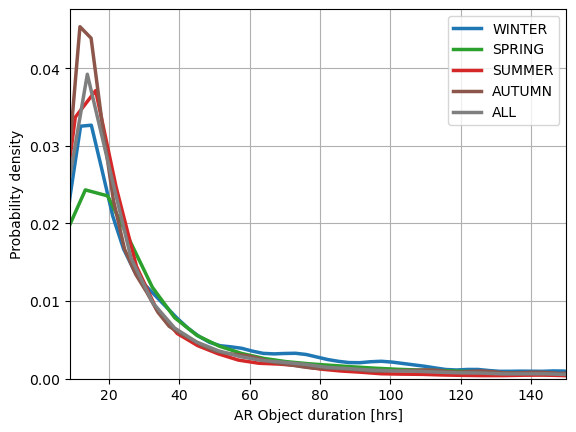

In [71]:
import seaborn as sns
fig, ax = plt.subplots()

for i,season_ in enumerate(Season):

    #fig, ax = plt.subplots()

    dat=IVTobj_ls.sel_season(season=season_).get_attributes(attr='duration')##obj_means("size")
    sns.kdeplot(dat,label=season_.name,color=bar_colors[i],lw=2.5,bw_adjust=0.3)
    #sns.histplot(dat,label=season_.name,color=bar_colors[i],bins=100, stat='density')

    

ax.set_xlabel('AR Object duration [hrs]')
ax.set_ylabel('Probability density')
plt.legend()
plt.grid()
ax.set_xlim(9,150)

(0.0, 150000.0)

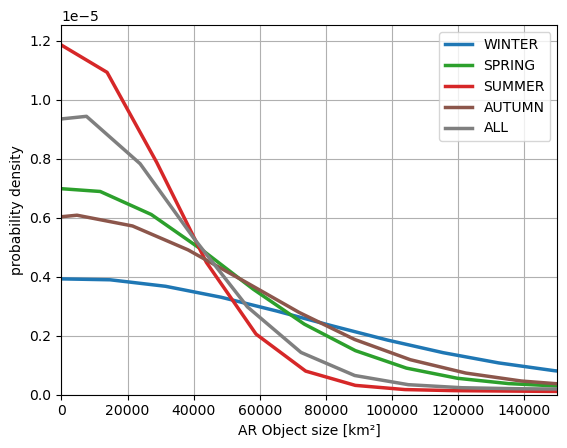

In [65]:
fig, ax = plt.subplots()

for i,season_ in enumerate(Season):

    #fig, ax = plt.subplots()

    dat=IVTobj_ls.sel_season(season=season_).obj_means(attr='size')##obj_means("size")
    sns.kdeplot(dat,label=season_.name,color=bar_colors[i],lw=2.5,bw_adjust=0.3)
   # sns.histplot(dat,label=season_.name,color=bar_colors[i],lw=2.5)
    #sns.histplot(dat,label=season_.name,color=bar_colors[i],bins=100, stat='density')

    

ax.set_xlabel('AR Object size [km²]')
ax.set_ylabel('probability density')
plt.legend()
plt.grid()
ax.set_xlim(0,150000)

(0.0, 23000.0)

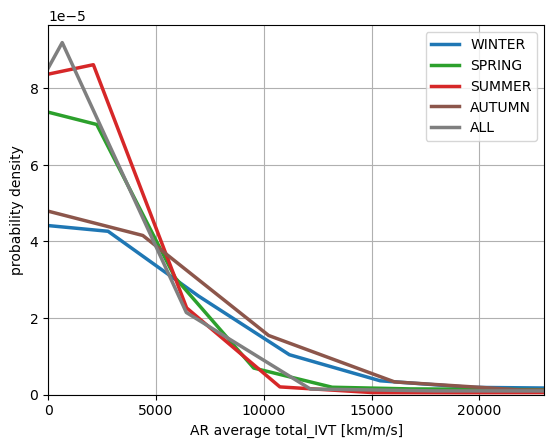

In [72]:
fig, ax = plt.subplots()

for i,season_ in enumerate(Season):

    #fig, ax = plt.subplots()

    dat=IVTobj_ls.sel_season(season=season_).obj_means(attr='total_IVT')##obj_means("size")
    sns.kdeplot(dat,label=season_.name,color=bar_colors[i],lw=2.5,bw_adjust=0.3)
   # sns.histplot(dat,label=season_.name,color=bar_colors[i],lw=2.5)
    #sns.histplot(dat,label=season_.name,color=bar_colors[i],bins=100, stat='density')

    

ax.set_xlabel('AR average total_IVT [km/m/s]')
ax.set_ylabel('probability density')
plt.legend()
plt.grid()
ax.set_xlim(0,23000)